# CHICKEN PRICES IN INDIA

Epp Haavasalu, Grete Hollo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

prices_df = pd.read_csv('chicken_prices_india.csv', sep=',')
prices = prices_df.values

In [2]:
df = pd.DataFrame(prices_df)

df["District"] = df["District"].str.split("(", expand=True )
df.isnull().sum()

Year           0
Month          0
District       0
1           1212
2           1191
3           1191
4           1193
5           1192
6           1167
7           1182
8           1181
9           1183
10          1216
11          1204
12          1200
13          1231
14          1205
15          1203
16          1203
17          1209
18          1187
19          1199
20          1203
21          1214
22          1258
23          1234
24          1234
25          1239
26          1251
27          1232
28          1249
29          1470
30          1606
31          2757
dtype: int64

In [3]:
df.iloc[456]

Year            2019
Month       February
District       Balia
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31               NaN
Name: 456, dtype: object

In [4]:
df.describe()

,Year,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,4771.000000,3559.000000,3580.000000,3580.000000,3578.000000,3579.000000,3604.000000,3589.000000,3590.000000,3588.000000,...,3513.000000,3537.000000,3537.000000,3532.000000,3520.000000,3539.000000,3522.000000,3301.000000,3165.000000,2014.000000
mean,2019.926431,88.623209,88.732123,88.831285,123.494410,90.112042,123.846004,90.585957,90.244568,89.335006,...,89.524338,89.685609,89.223636,91.893545,88.321875,88.534614,88.579500,89.220539,89.680253,87.968719
std,0.805794,38.023238,30.768885,20.775642,2025.415909,27.488165,2032.965008,38.769086,35.361995,27.627674,...,20.514414,34.903335,20.118203,153.689267,19.672585,25.671042,25.509532,33.335619,25.903316,22.160246
min,2018.000000,16.000000,30.000000,36.000000,11.000000,30.000000,25.000000,27.000000,24.000000,18.000000,...,15.000000,15.000000,20.000000,20.000000,20.000000,8.000000,20.000000,15.000000,11.000000,15.000000
25%,2019.000000,73.000000,74.000000,75.000000,76.000000,77.000000,77.000000,77.000000,76.000000,74.000000,...,75.000000,75.000000,75.000000,76.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000
50%,2020.000000,87.000000,87.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,88.000000,...,90.000000,90.000000,90.000000,90.000000,89.000000,88.000000,88.000000,88.000000,90.000000,88.000000
75%,2021.000000,100.000000,100.000000,100.250000,101.000000,102.000000,102.000000,103.000000,103.000000,102.000000,...,103.000000,102.000000,101.000000,100.000000,100.000000,100.000000,100.000000,100.000000,102.000000,100.000000
max,2021.000000,1213.000000,1069.000000,400.000000,121232.000000,1154.000000,122124.000000,1127.000000,1087.000000,1111.000000,...,145.000000,1087.000000,155.000000,9090.000000,177.000000,1078.000000,1077.000000,1219.000000,1001.000000,160.000000


In [5]:
df["Year"].value_counts()

2020    1702
2019    1683
2021    1368
2018      18
Name: Year, dtype: int64

In [6]:
df["Month"].value_counts()

February     446
July         444
January      439
March        438
April        428
May          428
June         421
August       421
September    412
November     303
October      297
December     294
Name: Month, dtype: int64

In [7]:
pd.set_option('display.max_rows', None)
df["District"].value_counts()

Safidon              99
Sangrur              83
Gurdaspur            82
Patiala              82
Pathankot            82
Ludhiana             82
Hoshiarpur           82
Nawanshahr           81
Indore               66
Jabalpur             66
Bhopal               66
Jagdishpur           60
Allahabad            60
Varanasi             60
Moga                 49
Dasuya               49
Barnala              49
Samrala              49
Batala               49
Mansa                49
Bahraich             42
Darbhanga            34
Samastipur           34
Sarthebari           34
Bokajan              34
Pathsala             34
Jagiroad             34
Kaliabor             34
Muzaffarpur          34
Golaghat             34
Hajipur              34
Mirza                34
Sasaram              34
Arrah                34
Mangaldai            34
Biswantahchariali    34
Abhayapuri           34
Chittur              34
Raha                 34
Patna                34
Bokaro               33
Malda           

In [8]:
'''
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]
df.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)
df = df.sort_index()

plt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor='white', align='left')
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Month')
'''

'\nsort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]\ndf.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)\ndf = df.sort_index()\n\nplt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor=\'white\', align=\'left\')\nplt.xticks(rotation=\'vertical\')\nplt.ylabel(\'Number of cases\')\nplt.xlabel(\'Month\')\n'

Text(0.5, 0, 'Town')

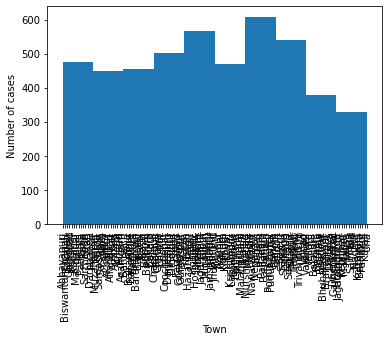

In [9]:
plt.hist(df["District"])
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Town')

In [10]:
original_data = df.copy(deep=True) # Make a deep copy, including a copy of the data and the indices

only_prices = df.drop(columns = ['Year', 'Month', 'District'])

x = 0
y = 0
changes = {}
nones = []
means = []

#print(df.iloc[15])

# iterate over rows in the prices table
for Index, row in only_prices.iterrows():
    row_changed = False
    median = row.median()
    mean_row = []
    for k in range(len(row)):
        mean_row.append(row[k])
        
    changed_values = []
    none_values = []

    # iterate over every value in the given row
    for i in range(31):
        try:
            
            if math.isnan(row[i]):
                none_values.append(i)
                row_changed = True
                
            # see if the values differ too much from the median
            elif (row[i] < median - 60) or (row[i] > median + 60): 
                
                #save the location of the value that needs changing
                changed_values.append(i)
                
                #create new row to calculate an accurate mean
                mean_row.remove(row[i])
                                
                row_changed = True
        except:
            print("error     error     error     error     error     error     error     error")
            continue
    
    if (row_changed):
        
        # if more than 5 values are missing from a row, then delete the whole row
        if len(none_values) > 5:
            nones.append(y)
        
        else: 
            mean_row  =[x for x in mean_row if math.isnan(x) == False]
            new_mean = round(sum(mean_row) / len(mean_row), 2)
            
            means.append(new_mean)
            
            for j in changed_values:
                df.iloc[y, j+3] = round(new_mean,2)

            for jj in none_values:
                df.iloc[y, jj+3] = round(new_mean,2)

            changes[y] = changed_values

            for ii in none_values:
                changes[y].append(ii)
    else:
        means.append(round(sum(mean_row) / len(mean_row), 2))
    
    y += 1


for kk in nones:
    df.drop(df.loc[df.index==kk].index, inplace=True)

df["Mean"] = means

print("Changes made: " + str(len(changes)))

#print(changes)

Changes made: 1702


In [11]:
df

,Year,Month,District,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Mean
18,2019,April,Agra,86.00,89.00,93.00,93.00,95.00,92.00,87.00,...,94.00,87.0,89.00,92.00,92.00,92.00,95.00,98.00,90.67,90.67
19,2019,April,Ajmer,86.00,90.00,85.00,99.00,99.00,94.00,92.00,...,90.00,88.0,90.00,92.00,92.00,95.00,96.00,98.00,92.07,92.07
20,2019,April,Akbarpur,92.00,98.00,104.00,105.00,105.00,98.00,94.00,...,96.00,96.0,100.00,102.00,105.00,105.00,107.00,114.00,98.97,98.97
21,2019,April,Allahabad,92.00,98.00,102.00,102.00,102.00,96.00,94.00,...,96.00,96.0,100.00,102.00,104.00,104.00,105.00,111.00,98.50,98.50
22,2019,April,Allahabad,90.00,101.00,102.00,102.00,100.00,94.00,89.00,...,96.00,100.0,100.00,103.00,103.00,103.00,110.00,112.00,95.93,95.93
23,2019,April,Alwar,82.00,88.00,90.00,92.00,92.00,88.00,86.00,...,82.00,82.0,86.00,88.00,88.00,88.00,90.00,92.00,87.13,87.13
24,2019,April,Ambala,82.00,85.00,88.00,92.00,96.00,92.00,87.00,...,87.00,85.0,87.00,89.00,89.00,90.00,90.00,92.00,88.63,88.63
25,2019,April,Amethi,90.00,96.00,100.00,102.00,102.00,95.00,92.00,...,94.00,95.0,98.00,100.00,102.00,103.00,105.00,111.00,96.80,96.80
26,2019,April,Anand,101.00,104.00,106.00,106.00,108.00,108.00,106.00,...,102.00,98.0,100.00,100.00,100.00,100.00,98.00,98.00,102.63,102.63
27,2019,April,Arrah,96.00,96.00,96.00,108.00,105.00,104.00,104.00,...,105.00,108.0,107.00,108.00,108.00,108.00,108.00,115.00,102.13,102.13


In [12]:
# ennustamine xgboost

for i in range(31):
    print(df.loc[df[str(i+1)].isnull() == True])

Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows